# **Koronavirüs (Covid-19) Salgını - Türkiye'nin Durumu**

## Sayı: 27  (23 Aralık 2020)

**Her güne ait tüm sayısal veriler, Türkiye'de ilk vakanın görüldüğü 11 Mart'tan beri T. C. Sağlık Bakanlığı Covid-19 Bilgilendirme Sayfası'nda günlük olarak yayımlanan "Türkiye Günlük Koronavirüs Tablosu"ndan alınmaktadır.**

### **Referans:** [covid19.saglik.gov.tr](https://covid19.saglik.gov.tr/)

**Hazırlayan:** Doğan Yiğit Yenigün (toUpperCase78)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covid19TR = pd.read_csv('covid_19_Turkiye_2020_12_23.csv')

In [2]:
covid19TR = covid19TR.set_index('Tarih')
covid19TR['Günlük Vaka'] = covid19TR['Günlük Vaka'].fillna(0).astype(int)
covid19TR['Toplam Vaka'] = covid19TR['Toplam Vaka'].fillna(0).astype(int)
covid19TR['Toplam Test'] = covid19TR['Toplam Test'].fillna(0).astype(int)
covid19TR['Ağır Hasta'] = covid19TR['Ağır Hasta'].fillna(0).astype(int)
covid19TR['Hasta Artış'] = covid19TR['Toplam Hasta'].diff().fillna(0).astype(int)
covid19TR['Vefat Artış'] = covid19TR['Toplam Vefat'].diff().fillna(0).astype(int)
covid19TR['İyileşen Artış'] = covid19TR['Toplam İyileşen'].diff().fillna(0).astype(int)
covid19TR['Test Artış'] = covid19TR['Toplam Test'].diff().fillna(0).astype(int)
covid19TR['Hasta +/-'] = covid19TR['Hasta Artış'].diff().fillna(0.).astype(int)
covid19TR['Vefat +/-'] = covid19TR['Vefat Artış'].diff().fillna(0).astype(int)
covid19TR['İyileşen +/-'] = covid19TR['İyileşen Artış'].diff().fillna(0).astype(int)
covid19TR['Vaka +/-'] = covid19TR['Günlük Vaka'].diff().fillna(0).astype(int)
covid19TR['Test +/-'] = covid19TR['Test Artış'].diff().fillna(0).astype(int)

In [3]:
ind = 274
while covid19TR.iloc[ind,8] != 0:
    covid19TR.iloc[ind-1,9] = covid19TR.iloc[ind,9] - covid19TR.iloc[ind,8]
    ind -= 1

### **Son 20 Güne Dair Sayısal Bilgiler**

In [4]:
covid19TR[['Toplam Hasta', 'Toplam Vefat', 'Toplam İyileşen', 'Toplam Test',
          'Zatürre Oranı(%)', 'Ağır Hasta', 'Günlük Vaka', 'Toplam Vaka']].tail(20)

,Toplam Hasta,Toplam Vefat,Toplam İyileşen,Toplam Test,Zatürre Oranı(%),Ağır Hasta,Günlük Vaka,Toplam Vaka
Tarih,,,,,,,,
2020-12-04,527070,14509,423142,19338181,3.3,5703,32736,1558798
2020-12-05,533198,14705,427242,19517084,3.3,5800,31896,1590694
2020-12-06,539291,14900,431253,19691845,3.3,5805,30402,1621096
2020-12-07,545711,15103,436270,19888747,3.1,5836,32137,1653233
2020-12-08,552304,15314,441515,20089966,3.1,5882,33198,1686431
2020-12-09,558517,15531,447361,20294377,3.1,5901,31712,1718143
2020-12-10,564435,15751,452593,20500579,3.1,5943,30424,1748567
2020-12-11,570042,15977,458109,20709452,3.1,5952,32106,1780673
2020-12-12,575245,16199,1581565,20898517,3.1,5961,29136,1809809


**NOT 1:** 29 Temmuz'dan itibaren _Toplam Yoğun Bakım Sayısı_ ve _Toplam Entübe Hasta Sayısı_ yerine _Hastalarda Zatürre Oranı_ ve _Ağır Hasta Sayısı_ paylaşılmaya başlanmıştır. Buradaki _Ağır Hasta Sayısı,_ oksijen saturasyonu belli oranın altında veya yoğun bakım gerektiren hastalar için uluslararası tanımlamaya uygun olarak belirlenmektedir.

**NOT 2:** 25 Kasım'dan itibaren hasta sayısı üzerine semptomsuz olduğu halde PCR testi pozitif çıkanların da dahil edildiği _Günlük Vaka_ sayısı paylaşılmaya başlanmıştır.

**NOT 3:** Bu tablodaki _Toplam Hasta Sayısı,_ 10 Aralık'tan sonra Covid-19 Bilgilendirme Sayfası Günlük Tablosu'nda görünmemesine rağmen halen görünür olan _Günlük Hasta Sayısı_ üzerine eklenerek hesaplanmaktadır.

**NOT 4:** 10 Aralık'tan itibaren paylaşılan _Toplam Vaka_ sayısı, PCR testi pozitif çıkan tüm kişilerin toplamını göstermektedir.

**NOT 5:** 10 Aralık'tan önceki _Toplam Vaka Sayısı,_ mevcut gündeki toplam vaka sayısının günlük vaka sayısı ile farkı alınarak bir önceki güne atanmıştır (Günlük Vaka sayısının ilk açıklandığı 25 Kasım'a kadar geriye dönük).

**NOT 6:** _Toplam İyileşen_ sayısı, 12 Aralık'tan itibaren iyileşen hastalara ilaveten izolasyon süresi dolan vakaları da dahil etmektedir.

### **Covid-19 - Türkiye'nin Durumu**

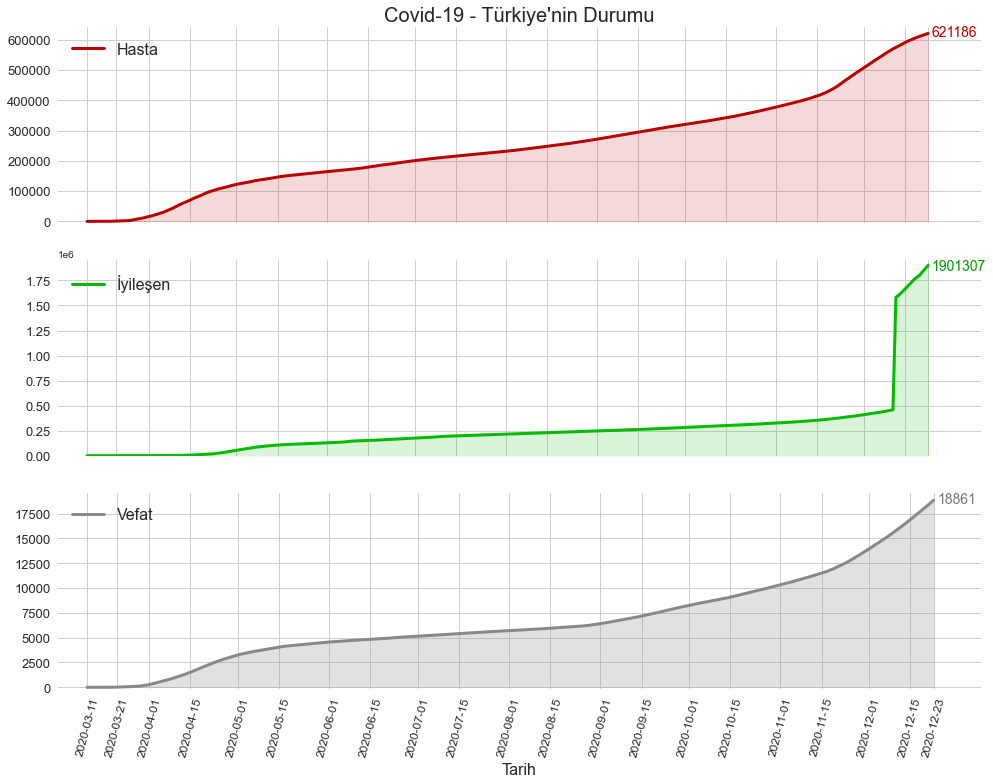

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(14,11), facecolor='white')
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#eeeeee'
gunler = [0, 10, 21, 35, 51, 65, 82, 96, 112, 126, 143, 157, 174, 188, 204, 218, 235, 249, 265, 279, len(covid19TR)-1]
plt.subplot(3, 1, 1)
plt.axis([-10,len(covid19TR)+17,-7000,max(covid19TR['Toplam Hasta'])+20000])
plt.plot(covid19TR['Toplam Hasta'], linewidth=3, color='#bb0000', label='Hasta')
plt.fill_between(range(len(covid19TR)), covid19TR['Toplam Hasta'], color='#bb0000', alpha=0.15)
plt.text(len(covid19TR)+0.25,covid19TR['Toplam Hasta'][-1]-8000, covid19TR['Toplam Hasta'][-1], 
         color='#bb0000', fontsize=14)
plt.title('Covid-19 - Türkiye\'nin Durumu', fontsize=20)
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.yticks(fontsize=13)
plt.grid(color='#cfcfcf')
plt.legend(loc='upper left', fontsize=16)
plt.subplot(3, 1, 2)
plt.axis([-10,len(covid19TR)+17,-7000,max(covid19TR['Toplam İyileşen'])+50000])
plt.plot(covid19TR['Toplam İyileşen'], linewidth=3, color='#00bb00', label='İyileşen')
plt.fill_between(range(len(covid19TR)), covid19TR['Toplam İyileşen'], color='#00bb00', alpha=0.15)
plt.text(len(covid19TR)+0.25, covid19TR['Toplam İyileşen'][-1]-50000, covid19TR['Toplam İyileşen'][-1], 
         color='#009900', fontsize=14)
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.yticks(fontsize=13)
plt.grid(color='#cfcfcf')
plt.legend(loc='upper left', fontsize=16)
plt.subplot(3, 1, 3)
plt.axis([-10,len(covid19TR)+15,-200,max(covid19TR['Toplam Vefat'])+700])
plt.plot(covid19TR['Toplam Vefat'], linewidth=3, color='#888888', label='Vefat')
plt.fill_between(range(len(covid19TR)), covid19TR['Toplam Vefat'], color='#888888', alpha=0.25)
plt.text(len(covid19TR)+0.25, covid19TR['Toplam Vefat'][-1]-300, covid19TR['Toplam Vefat'][-1], 
         color='#777777', fontsize=14)
plt.xlabel('Tarih', fontsize=16)
plt.xticks(gunler, fontsize=12, rotation=75)
plt.yticks(fontsize=13)
plt.grid(color='#cfcfcf')
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()
plt.show()

Türkiye'nin Koronavirüs ile mücadelesinde yukarıdaki grafiklere bakıldığında; 

Hasta artışlarının yüksek olduğu zaman aralığı **Nisan ayının başları ile sonları arasında**, takip eden aylarda ise neredeyse sabit bir şekilde arttığı görülebilmektedir. Ancak **Kasım ayının ikinci yarısından sonra** yeniden hasta artış hızı yükselmiştir! (Toplam hasta sayısının nasıl edildiği hakkında bilgi için yukarıdaki **NOT 3**'e bakınız)

İyileşen hızı, **Nisan ayının sonları ile Mayıs ayının ikinci yarısına** kadarki günlerde yüksek düzeyde seyretmiştir. 12 Aralık tarihine kadar bu sayı **500 bin**'e yaklaşmıştır. Bu tarihten sonra **izolasyon süresi dolan vakalar**ın da dahil edilmesiyle (yukarıdaki **NOT 6**'ya bakınız) sayıda bir anda sıçrama yaşanmıştır ve grafiğe göre **sabit bir şekilde** yükselmeye devam etmektedir.

Vefat sayısındaki eğim için başlarda **Nisan ayı içinde** yüksek seyretmiş, **Mayıs ayından sonra** yavaşlamış, ama **Eylül ayından itibaren** yine giderek yükselmektedir ve bu eğim **Kasım ayının ikinci yarısından sonra** artmaya devam etmektedir!

_Toplam Vaka Sayısı ile ilgili genel durum da bir sonraki sayıda eklenecektir._

### **Son 20 Güne Dair Hasta Sayısı Grafiği**

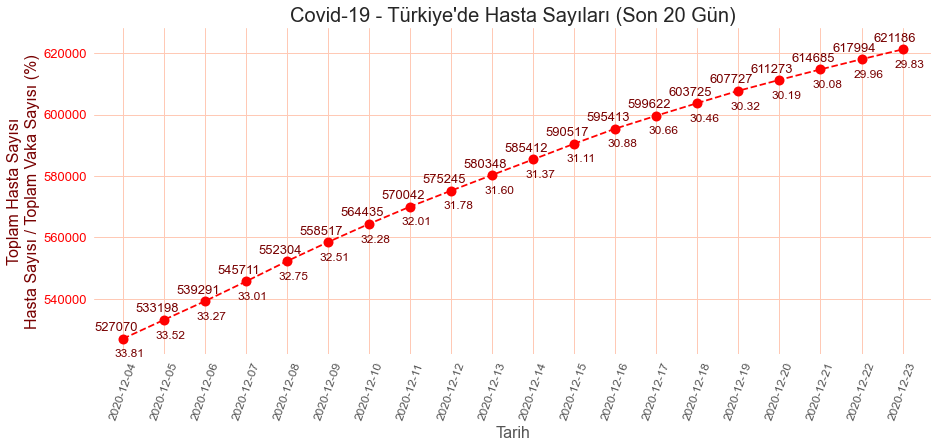

In [6]:
plt.figure(figsize=(15,6), facecolor='white')
plt.plot(covid19TR.index[-20:], covid19TR['Toplam Hasta'][-20:], marker='o', markersize=10, linestyle='--', color='r')
plt.axis([-0.7,19.7,min(covid19TR['Toplam Hasta'][-20:])-5000,max(covid19TR['Toplam Hasta'][-20:])+7000])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.3), covid19TR.iloc[i,0]+2500, covid19TR.iloc[i,0], fontsize=13, color='#770000')
    plt.text(i-(len(covid19TR)-19.8), covid19TR.iloc[i,0]-6000, "{:.2f}".format(covid19TR.iloc[i,0]/covid19TR.iloc[i,9]*100),
             fontsize=12, color='#770000')
plt.title('Covid-19 - Türkiye\'de Hasta Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam Hasta Sayısı\nHasta Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#770000')
plt.grid(color='#ffc9b5')
plt.show()

Toplam hasta sayısı grafikte görüldüğü üzere **621 bini** geçmiştir! Bu sayının toplam vaka sayısına oranı da 4 Aralık'ta **%33.81** olduğu görülürken, 23 Aralık'ta **%29.83**'e kadar gerilemiştir.

### Son 20 Güne Dair Vaka Sayısı Grafiği

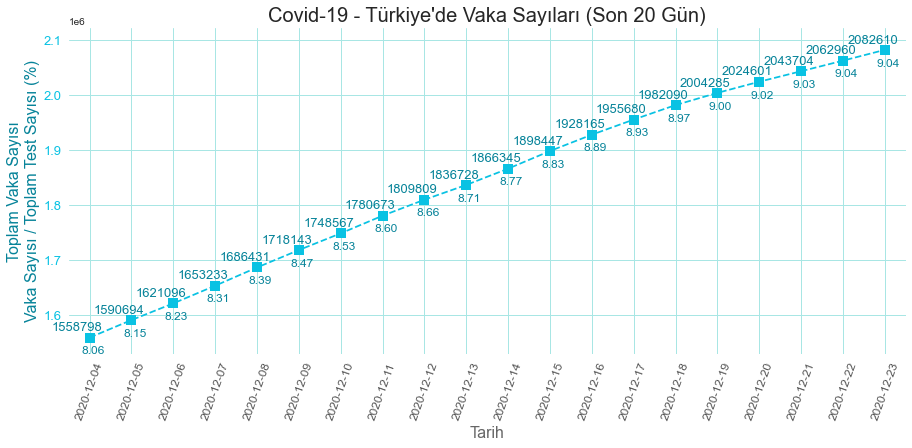

In [7]:
plt.figure(figsize=(15,6))
plt.axis([-0.5,19.5,min(covid19TR['Toplam Vaka'][-20:])-30000,max(covid19TR['Toplam Vaka'][-20:]+40000)])
plt.plot(covid19TR.index[-20:], covid19TR['Toplam Vaka'][-20:], marker='s', markersize=10, linestyle='--', color='#09c2e3')
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-len(covid19TR)+19.1, covid19TR.iloc[i,9]+12000, covid19TR.iloc[i,9], color='#068399', fontsize=13)
    plt.text(i-len(covid19TR)+19.8, covid19TR.iloc[i,9]-30000, "{:.2f}".format(covid19TR.iloc[i,9]/covid19TR.iloc[i,3]*100), 
             color="#068399", fontsize=12)
plt.title('Covid-19 - Türkiye\'de Vaka Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.ylabel('Toplam Vaka Sayısı\nVaka Sayısı / Toplam Test Sayısı (%)', fontsize=16, color='#068399')
plt.yticks(fontsize=13, color='#09c2e3')
plt.grid(color='#a8e6e4')
plt.show()

**10 Aralık**'tan itibaren paylaşılmaya başlanan ve mevcut _Günlük Vaka_ sayıları ile geriye dönük hesaplamaları da dahil olunan (yukarıdaki **NOT 5**'e bakınız) _Toplam Vaka Sayılarına_ dair grafiğe göre en son 23 Aralık'ta **2 milyon 82 bin 610** olarak gerçekleşmiştir. Bu sayının toplam test sayısına oranı da, önceleri **%8**'lerde iken son ölçümde **%9.04**'tür.

### **Son 20 Güne Dair Vefat Sayısı Grafiği**

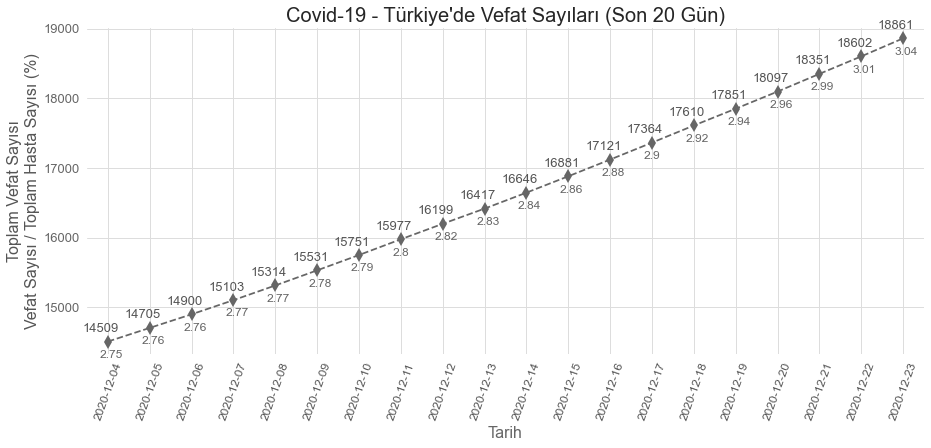

In [8]:
plt.figure(figsize=(15,6))
plt.plot(covid19TR.index[-20:], covid19TR['Toplam Vefat'][-20:], marker='d', markersize=10, linestyle='--', color='#666666')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
plt.axis([-0.5,19.5,min(covid19TR['Toplam Vefat'][-20:])-180,max(covid19TR['Toplam Vefat'][-20:])+150])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.4), covid19TR.iloc[i,1]+140, covid19TR.iloc[i,1], fontsize=13, color='#555555')
    plt.text(i-(len(covid19TR)-19.8), covid19TR.iloc[i,1]-230, round(covid19TR.iloc[i,1]/covid19TR.iloc[i,0]*100, 2), 
             fontsize=12, color='#666666')
plt.title('Covid-19 - Türkiye\'de Vefat Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.ylabel('Toplam Vefat Sayısı\nVefat Sayısı / Toplam Hasta Sayısı (%)', fontsize=16, color='#555555')
plt.grid(color='#dddddd')
plt.show()

Toplam vefat sayısı **18 bin 800**'ü aşmıştır! Bunun yanında toplam hasta sayısına oran, 4 Aralık tarihinde **%2.75**'te iken 23 Aralık'ta **%3**'ün üzerine çıkmıştır!

### **Son 20 Güne Dair İyileşen Hasta Sayısı Grafiği**

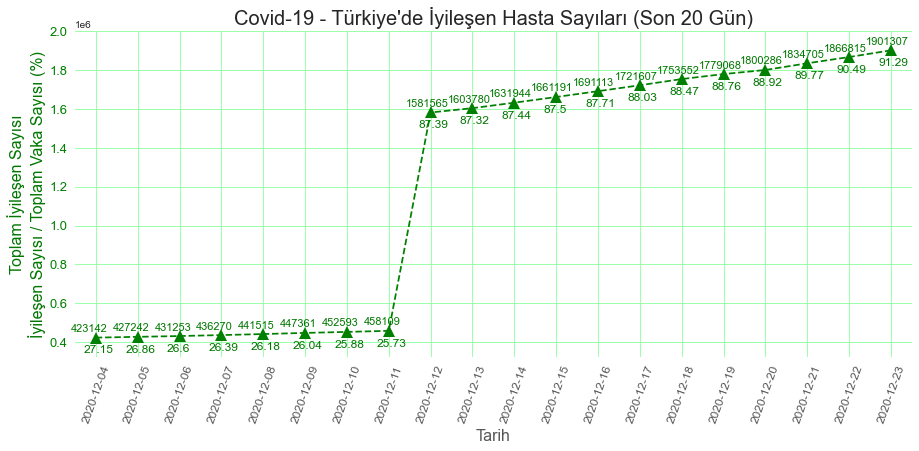

In [9]:
plt.figure(figsize=(15,6))
plt.plot(covid19TR.index[-20:], covid19TR['Toplam İyileşen'][-20:], marker='^', markersize=12, linestyle='--', color='g')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
plt.axis([-0.5,19.5,min(covid19TR['Toplam İyileşen'][-20:])-100000,max(covid19TR['Toplam İyileşen'][-20:])+100000])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.4), covid19TR.iloc[i,2]+30000, covid19TR.iloc[i,2], fontsize=11, color='#007700')
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,2]-80000, round(covid19TR.iloc[i,2]/covid19TR.iloc[i,9]*100, 2), 
             fontsize=12, color='#007700')
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam İyileşen Sayısı\nİyileşen Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#007700')
plt.grid(color='#9cffac')
plt.show()

İyileşen hasta sayısı son olarak **1 milyon 901 bin**i geçmiştir. Bu sayının toplam vaka sayısına oran, **izolasyon süresi dolan vakaların** dahil edilmesiyle (yukarıdaki **NOT 6**'ya bakınız) 12 Aralık'ta **%87.39**'a sıçramış, en son 23 Aralık'ta **%91.29**'a kadar yükselmiştir.

### **Son Günlere Dair Günlük Hasta, Vaka, Vefat, İyileşen & Test Artışları İstatistikleri ve Dağılımları**

In [10]:
# Son 90 Gün - Hasta Artış, Vefat Artış ve Test Artış
round(covid19TR[['Hasta Artış', 'Vefat Artış', 'Test Artış']][-90:].describe(), 2)

,Hasta Artış,Vefat Artış,Test Artış
count,90.00,90.00,90.00
mean,3459.96,123.07,147871.94
std,1920.47,67.48,33003.24
min,1391.00,55.00,93219.00
25%,1812.75,71.00,116139.50
50%,2522.50,84.50,145700.00
75%,5104.50,187.75,174115.25
max,7381.00,259.00,208873.00


In [11]:
# Son 11 Gün - İyileşen Artış (izolasyon süresi dolan vakalar dahil)
round(covid19TR['İyileşen Artış'][-11:].describe(), 2)

count       11.00
mean     29067.45
std       4476.59
min      21218.00
25%      26840.00
50%      29922.00
75%      32027.50
max      34492.00
Name: İyileşen Artış, dtype: float64

In [12]:
# Açıklanan tüm Günlük Vaka sayıları (25 Kasım ve sonrası)
round(covid19TR['Günlük Vaka'][259:].describe(), 2)

count       29.00
mean     28582.52
std       4310.07
min      19103.00
25%      27515.00
50%      29845.00
75%      31896.00
max      33198.00
Name: Günlük Vaka, dtype: float64

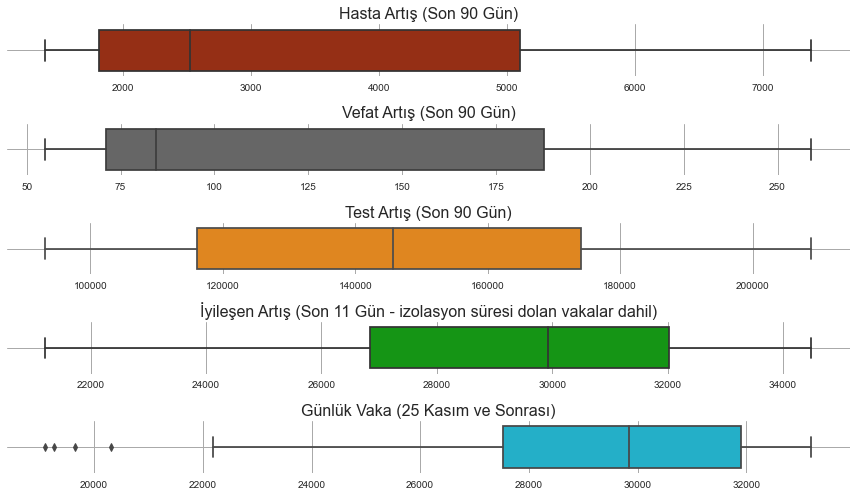

In [13]:
plt.figure(figsize=(12,7))
plt.subplot(5,1,1)
sns.boxplot(x=['Hasta Artış'], data=covid19TR[-90:], color='#aa2200')
plt.title('Hasta Artış (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(5,1,2)
sns.boxplot(x=['Vefat Artış'], data=covid19TR[-90:], color='#666666')
plt.title('Vefat Artış (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(5,1,3)
sns.boxplot(x=['Test Artış'], data=covid19TR[-90:], color='#ff8800')
plt.title('Test Artış (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(5,1,4)
sns.boxplot(x=['İyileşen Artış'], data=covid19TR[-11:], color='#00aa00')
plt.title('İyileşen Artış (Son 11 Gün - izolasyon süresi dolan vakalar dahil)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(5,1,5)
sns.boxplot(x=['Günlük Vaka'], data=covid19TR[259:], color='#09c2e3')
plt.title('Günlük Vaka (25 Kasım ve Sonrası)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.tight_layout()
plt.show()

### Tüm Günler - Hasta, Vefat & İyileşen Artış Sayıları + Sonraki Günlere Ait Tahminler

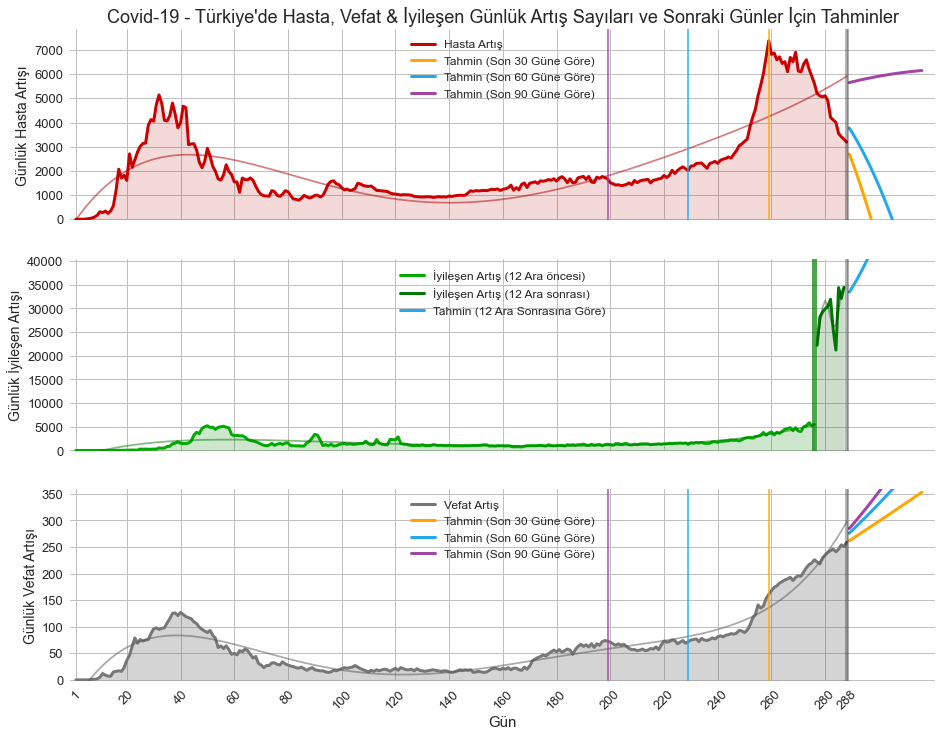

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
gun_cizgiler = np.array([0, 19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, 279, len(covid19TR)-1])
gun_aralik_hasta_vefat = [30, 60, 90]
renk=['orange', '#23a8ed', '#a345a4']
y_pred_hasta_vefat = []
polynomial = PolynomialFeatures(degree=2)
linear = LinearRegression()
for s in range(1,3):
    y_pred = []
    for g in gun_aralik_hasta_vefat:
        if s == 1:     y = covid19TR['Hasta Artış'].values[len(covid19TR)-g:].reshape(-1,1)
        else:          y = covid19TR['Vefat Artış'].values[len(covid19TR)-g:].reshape(-1,1)
        x = np.array(list(range(len(y)))).reshape(-1,1)
        x_test = np.array(list(range(len(y), len(y)+28))).reshape(-1,1)
        x_poly = polynomial.fit_transform(x)
        x_test_poly = polynomial.fit_transform(x_test)
        linear.fit(x_poly, y)
        y_pred.append(linear.predict(x_test_poly))
    y_pred_hasta_vefat.append(y_pred)
y = covid19TR['İyileşen Artış'][277:].values.reshape(-1,1)
x = np.array(list(range(len(y)))).reshape(-1,1)
x_test_iyilesen = np.array(list(range(len(y), len(y)+28))).reshape(-1,1) 
x_poly = polynomial.fit_transform(x)
x_test_poly = polynomial.fit_transform(x_test_iyilesen)
linear.fit(x_poly, y)
y_pred_iyilesen = linear.predict(x_test_poly)
poly_pred_hasta_vefat = []
polynomial = PolynomialFeatures(degree=5)
for s in range(1,3): 
    if s == 1:    y = covid19TR['Hasta Artış'].fillna(0).values.reshape(-1,1)
    else:         y = covid19TR['Vefat Artış'].fillna(0).values.reshape(-1,1)
    x = np.array(list(range(len(y)))).reshape(-1,1)
    x_poly = polynomial.fit_transform(x)
    linear.fit(x_poly, y)
    poly_pred_hasta_vefat.append(linear.predict(x_poly))
poly_pred_iyilesen = []
for s in range(1,3):
    if s == 1:    y = covid19TR['İyileşen Artış'][:276].fillna(0).values.reshape(-1,1)
    else:         y = covid19TR['İyileşen Artış'][277:].fillna(0).values.reshape(-1,1)
    x = np.array(list(range(len(y)))).reshape(-1,1)
    x_poly = polynomial.fit_transform(x)
    linear.fit(x_poly, y)
    poly_pred_iyilesen.append(linear.predict(x_poly))
plt.figure(figsize=(15.5,12))
plt.subplot(3,1,1)
plt.title('Covid-19 - Türkiye\'de Hasta, Vefat & İyileşen Günlük Artış Sayıları ve Sonraki Günler İçin Tahminler', fontsize=18)
plt.plot(covid19TR['Hasta Artış'], color='#cc0000', linewidth=3, label='Hasta Artış')
plt.plot(poly_pred_hasta_vefat[0], color='#aa0000', alpha=0.5)
plt.fill_between(range(len(covid19TR)), covid19TR['Hasta Artış'], color='#bb0000', alpha=0.15)
plt.axis([-2, len(covid19TR)+32, covid19TR['Hasta Artış'].min()-50, covid19TR['Hasta Artış'].max()+500])
for i in range(len(gun_aralik_hasta_vefat)):
    plt.plot(x_test+len(covid19TR)-90, y_pred_hasta_vefat[0][i], color=renk[i], 
             label='Tahmin (Son ' + str(gun_aralik_hasta_vefat[i])  + ' Güne Göre)', linewidth=3)
    plt.axvline(x=len(covid19TR)-gun_aralik_hasta_vefat[i], alpha=0.8, color=renk[i])
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.3)
plt.xticks(gun_cizgiler, ['' for _ in range(len(gun_cizgiler))])
plt.yticks(fontsize=13)
plt.ylabel('Günlük Hasta Artışı', fontsize=14)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper center', fontsize=12)
plt.subplot(3,1,2)
plt.axis([-2, len(covid19TR)+32, -50, covid19TR['İyileşen Artış'][277:].max()+6000])
plt.plot(covid19TR['İyileşen Artış'][:276], color='#00aa00', linewidth=3, label='İyileşen Artış (12 Ara öncesi)')
plt.fill_between(range(len(covid19TR[:276])), covid19TR['İyileşen Artış'][:276], color='#008800', alpha=0.2)
plt.plot(poly_pred_iyilesen[0], color='#007700', alpha=0.5)
plt.plot(covid19TR['İyileşen Artış'][277:], color='#007700', linewidth=3, label='İyileşen Artış (12 Ara sonrası)')
plt.fill_between(range(276,len(covid19TR)-1), covid19TR['İyileşen Artış'][277:], color='#005500', alpha=0.2)
plt.plot(range(276,len(covid19TR)-1), poly_pred_iyilesen[1], color='#004400', alpha=0.4)
plt.plot(x_test_iyilesen+277, y_pred_iyilesen, color=renk[1], linewidth=3, label='Tahmin (12 Ara Sonrasına Göre)')
plt.axvline(275, color='g', linewidth=5, alpha=0.7)
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.3)
plt.xticks(gun_cizgiler, ['' for _ in range(9)])
plt.ylabel('Günlük İyileşen Artışı', fontsize=14)
plt.yticks(fontsize=13)
plt.legend(loc='upper center', fontsize=12)
plt.grid(color='#c0c0c0')
plt.subplot(3,1,3)
plt.plot(covid19TR['Vefat Artış'], color='#777777', linewidth=3, label='Vefat Artış')
plt.plot(poly_pred_hasta_vefat[1], color='#555555', alpha=0.5)
plt.fill_between(range(len(covid19TR)), covid19TR['Vefat Artış'], color='#555555', alpha=0.25)
plt.axis([-2, len(covid19TR)+32, covid19TR['Vefat Artış'].min()-2, covid19TR['Vefat Artış'].max()+100])
for i in range(len(gun_aralik_hasta_vefat)):
    plt.plot(x_test+len(covid19TR)-90, y_pred_hasta_vefat[1][i], color=renk[i], 
             label='Tahmin (Son ' + str(gun_aralik_hasta_vefat[i])  + ' Güne Göre)', linewidth=3)
    plt.axvline(x=len(covid19TR)-gun_aralik_hasta_vefat[i], alpha=0.8, color=renk[i])
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.3)
plt.xlabel('Gün', fontsize=15)
plt.xticks(gun_cizgiler, gun_cizgiler+1, fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.ylabel('Günlük Vefat Artışı', fontsize=14)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper center', fontsize=12)
plt.show()

_**ÖNEMLİ:** 12 Aralık'a ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından ilgili grafiğe dahil edilmemiştir!_

_Makine öğrenmesi yardımıyla_ gelecek haftalar için tahminlere baktığımızda, _hasta_ sayısı son 30 ve 60 güne göre **giderek azalacağı** ama son 90 güne göre **çok hafif şekilde artarak yatay seyirde** olabileceği, _vefat_ sayısının tüm durumlarla **giderek yükselmeye devam edeceği** ve _iyileşen_ sayısının 12 Aralık'tan sonraki değerler göz önüne alındığında **giderek daha fazla yükseleceği** açıkça öngörülebilmektedir!

_Günlük Vaka Artışına dair şekil ve öngörülen tahmin bir sonraki sayıda eklenecektir._

### **Son 20 Gün İçindeki Hasta Sayısı Artışları**

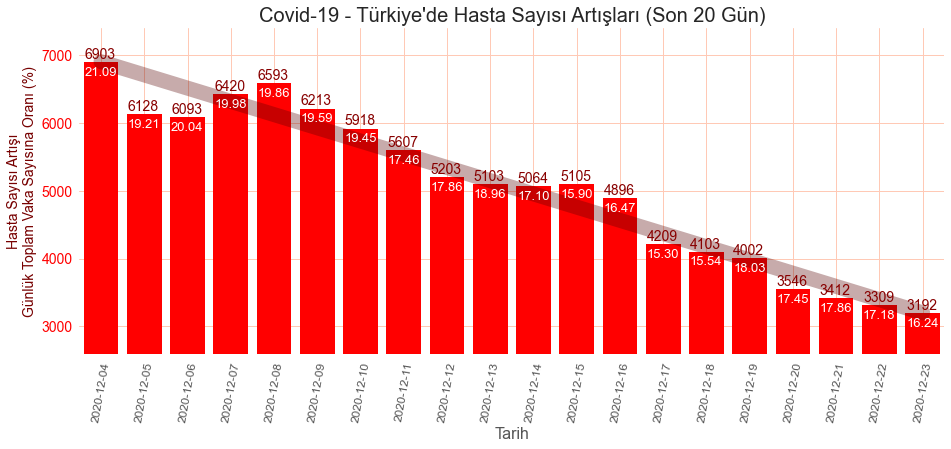

In [15]:
plt.figure(figsize=(15.5,6))
slp, intcp = np.polyfit(list(range(20)), covid19TR['Hasta Artış'][-20:], 1)
plt.bar(covid19TR.index[-20:], covid19TR['Hasta Artış'][-20:], color='r')
plt.axis([-0.5,19.5,covid19TR['Hasta Artış'][-20:].min()-600,covid19TR['Hasta Artış'][-20:].max()+500])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.62), covid19TR.iloc[i,10]+50, int(covid19TR.iloc[i,10]), fontsize=14, color='#880000')
    plt.text(i-(len(covid19TR)-19.62), covid19TR.iloc[i,10]-200, 
             "{:.2f}".format(round(covid19TR.iloc[i,10] / covid19TR.iloc[i,8] * 100, 2)), fontsize=13, color='white')
plt.plot([0, 19],[intcp, intcp+(slp*19)], color='#550000', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Artışları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Artışı\nGünlük Toplam Vaka Sayısına Oranı (%)', fontsize=14, color='#770000')
plt.grid(color='#ffc9b5')
plt.show()

Son 20 günün hasta sayıları incelendiğinde; en yüksek sayı **6903 ile 4 Aralık'ta** ölçülmüş olup, bunu takip eden günlerde giderek azalmalar kaydedilmiştir ve son olarak 23 Aralık'ta bu sayı **3192**'ye kadar gerilemiştir! 

Günlük toplam vaka sayısına oranlar ise **4 ve 6 Aralık**'ta **%20**'nin üzerinde iken sonraki günlerde yükseliş ve alçalışla beraber en son 23 Aralık'ta **%16.24** olarak ölçülmüştür.

### Son 20 Gün İçindeki Günlük Vaka Sayısı

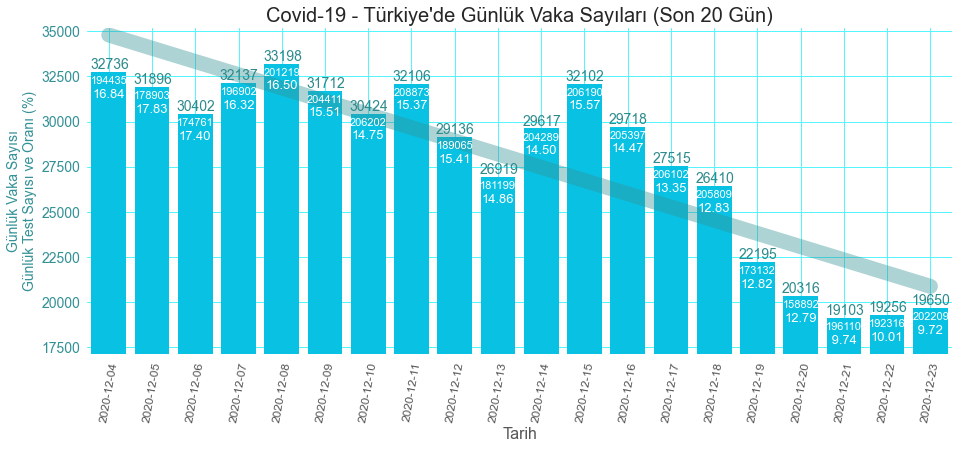

In [16]:
plt.figure(figsize=(15.5,6))
slp, intcp = np.polyfit(list(range(20)), covid19TR['Günlük Vaka'][-20:], 1)
plt.bar(covid19TR.index[-20:], covid19TR['Günlük Vaka'][-20:], color='#09c2e3')
plt.axis([-0.5,19.5,covid19TR['Günlük Vaka'][-20:].min()-2000,covid19TR['Günlük Vaka'][-20:].max()+2000])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#339196', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.57), covid19TR.iloc[i,8]+180, int(covid19TR.iloc[i,8]), fontsize=14, color='#2e8a8d')
    plt.text(i-(len(covid19TR)-19.58), covid19TR.iloc[i,8]-650, int(covid19TR.iloc[i,13]), fontsize=11, color='white')
    plt.text(i-(len(covid19TR)-19.62), covid19TR.iloc[i,8]-1400, 
            "{:5.2f}".format(covid19TR.iloc[i,8] / covid19TR.iloc[i,13] * 100), fontsize=13, color='white')
plt.plot([0, 19],[intcp, intcp+(slp*19)], color='#339196', linewidth=15, alpha=0.4)
plt.title('Covid-19 - Türkiye\'de Günlük Vaka Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Günlük Vaka Sayısı\nGünlük Test Sayısı ve Oranı (%)', fontsize=14, color='#339196')
plt.grid(color='#56f4fc')
plt.show()

Son 20 günün vaka sayıları incelendiğinde, en çok pozitif vaka **33198** ile 8 Aralık'ta ve en az **19103** ile 21 Aralık'ta görülmüştür. Günlük test sayısına oranlarda ise önceleri **%15-18** arasında devam ederken, son üç günün **%10** civarlarında olduğu gözlemlenmektedir.

### **Son 20 Gün İçindeki Vefat Sayısı Artışları**

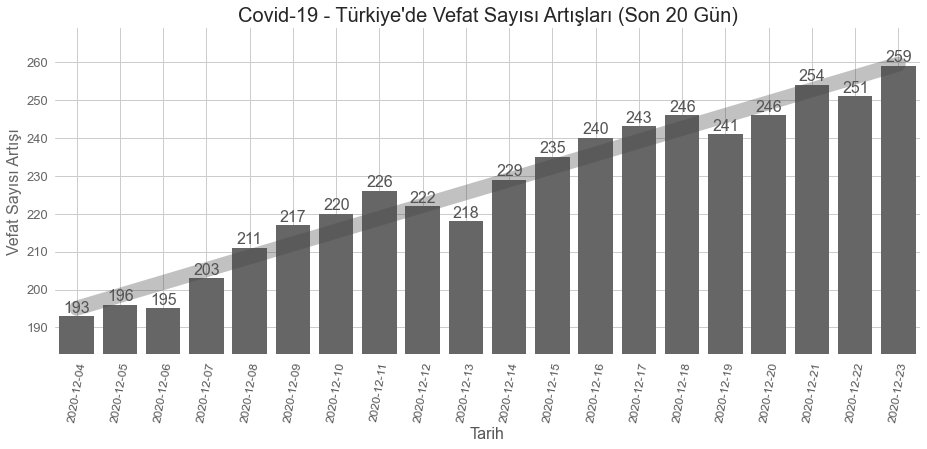

In [17]:
plt.figure(figsize=(15.5,6))
slp, intcp = np.polyfit(list(range(20)), covid19TR['Vefat Artış'][-20:], 1)
plt.bar(covid19TR.index[-20:], covid19TR['Vefat Artış'][-20:], color='#666666')
plt.axis([-0.5,19.5,covid19TR['Vefat Artış'][-20:].min()-10,covid19TR['Vefat Artış'][-20:].max()+10])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,11]+1, int(covid19TR.iloc[i,11]), fontsize=16, color='#555555')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#444444', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Artışları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Artışı', fontsize=16, color='#666666')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vefat sayılarına bakıldığında, **7 Aralık** tarihinde ilk kez **200**'ü geçmesi, sonraki günlerde genel anlamda **artış eğiliminde** olması ve en son 23 Aralık'ta sayının **259**'a yükselmesi büyük endişe vericidir! 

### **Son 2 Hafta İçindeki İyileşen Hasta Sayısı Artışları**

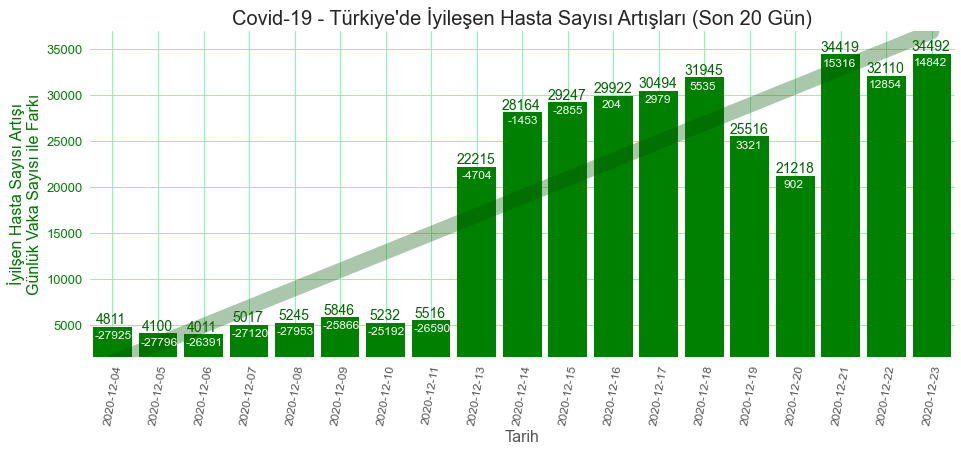

In [18]:
plt.figure(figsize=(15.5,6))
index = np.concatenate((covid19TR['İyileşen Artış'][268:276].index, covid19TR['İyileşen Artış'][277:].index))
iyilesen_artis = np.concatenate((covid19TR['İyileşen Artış'][268:276].values, covid19TR['İyileşen Artış'][277:].values))
gunluk_vaka = np.concatenate((covid19TR['Günlük Vaka'][268:276].values, covid19TR['Günlük Vaka'][277:].values))
slp, intcp = np.polyfit(list(range(19)), iyilesen_artis, 1)
plt.bar(index, iyilesen_artis, color='g', width=0.85)
plt.axis([-0.5,18.5,iyilesen_artis.min()-2500,iyilesen_artis.max()+2500])
plt.xticks(index, rotation=80, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
for i in range(len(iyilesen_artis)):
    if iyilesen_artis[i] >= 10000:
        plt.text(i-0.44, iyilesen_artis[i]+300, int(iyilesen_artis[i]), fontsize=14, color='#006600')
    else:
        plt.text(i-0.36, iyilesen_artis[i]+300, int(iyilesen_artis[i]), fontsize=14, color='#006600')
    if abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 10000:
        plt.text(i-0.39, iyilesen_artis[i]-1300, int(iyilesen_artis[i] - gunluk_vaka[i]), fontsize=12, color='white')
    elif abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 1000:
        plt.text(i-0.32, iyilesen_artis[i]-1300, int(iyilesen_artis[i] - gunluk_vaka[i]), fontsize=12, color='white')
    elif abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 100:
        plt.text(i-0.25, iyilesen_artis[i]-1300, int(iyilesen_artis[i] - gunluk_vaka[i]), fontsize=12, color='white')
plt.plot([0, 18], [intcp, intcp+(slp*18)], color='#005500', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayısı Artışları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyilşen Hasta Sayısı Artışı\nGünlük Vaka Sayısı ile Farkı', fontsize=16, color='#007700')
plt.grid(color='#7cffac')
plt.show()

_**ÖNEMLİ:** 12 Aralık'a ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından grafiğe dahil edilmemiştir!_

Günlük iyileşen hasta sayısında 12 Aralık'tan sonra **izolasyon süresi dolan vakaların** da dahil edilmesiyle beraber (yukarıdaki **NOT 6**'ya bakınız), sayılar artık en az **20 binin üzerinde** çıkmaktadır. Bu günler içinde en yüksek olan **34492** ile **23 Aralık**'tır. Bunun yanında, günlük vaka sayısına en yüksek fark, **15316** ile **21 Aralık**'ta ölçülmüştür.

### **Son 20 Gün İçindeki Günlük İyileşen Sayısının Vaka Sayısına Oranı**

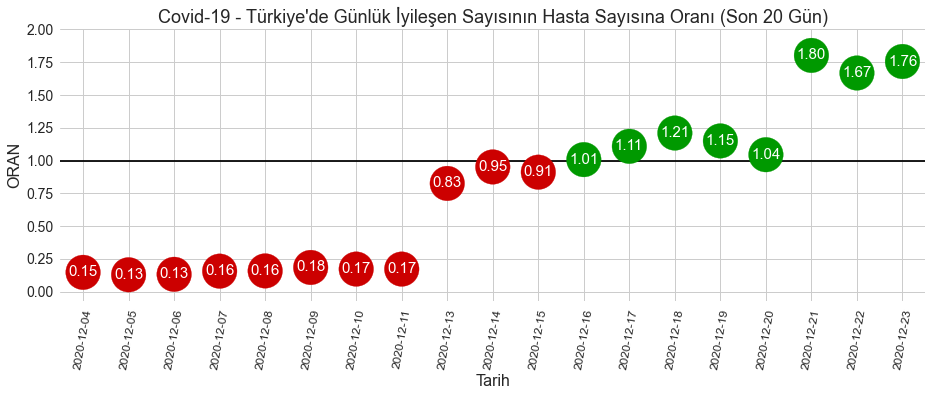

In [19]:
index = np.concatenate((covid19TR['İyileşen Artış'][268:276].index, covid19TR['İyileşen Artış'][277:].index))
iyilesen_son20 = np.concatenate((covid19TR['İyileşen Artış'][268:276].values, covid19TR['İyileşen Artış'][277:].values))
vaka_son20 = np.concatenate((covid19TR['Günlük Vaka'][268:276].values, covid19TR['Günlük Vaka'][277:].values))
oranlar = iyilesen_son20 / vaka_son20
colors = []
for i in range(19):
    if oranlar[i] < 1.0:    colors.append('#cc0000')
    else:    colors.append('#009900')
plt.figure(figsize=(15.5,5))
plt.axis([-0.5, 18.5, min(oranlar)-0.20, max(oranlar)+0.20])
plt.axhline(1.0, color='black', zorder=1)
plt.scatter(index, oranlar, marker="o", s=1200, color=colors, zorder=2)
for i in range(19):
    plt.text(i-0.32, oranlar[i]-0.03, "{:.2f}".format(round(oranlar[i], 2)), color='white', fontsize=15)
plt.title("Covid-19 - Türkiye\'de Günlük İyileşen Sayısının Hasta Sayısına Oranı (Son 20 Gün)", fontsize=18)
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('ORAN', fontsize=16)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=14)
plt.grid(color='#cccccc', zorder=0)
plt.show()

_**ÖNEMLİ:** 12 Aralık'a ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından grafiğe dahil edilmemiştir!_

12 Aralık'tan sonra **izolasyon süresi dolan vakaların** da dahil edilmesiyle beraber (yukarıdaki **NOT 6**'ya bakınız), özellikle **son sekiz günde** iyileşen hasta sayısı, günlük vaka sayısının üzerinde çıkmıştır ve **son üç günde** de bu fark daha yüksek olmuştur. Oranın en yüksek olduğu gün **1.8** kat ile **21 Aralık**'tır.

### **Tüm Günler Hasta/Vefat/İyileşen/Günlük Vaka Sayılarının Birbirleriyle İlişkileri ve Katsayıları**

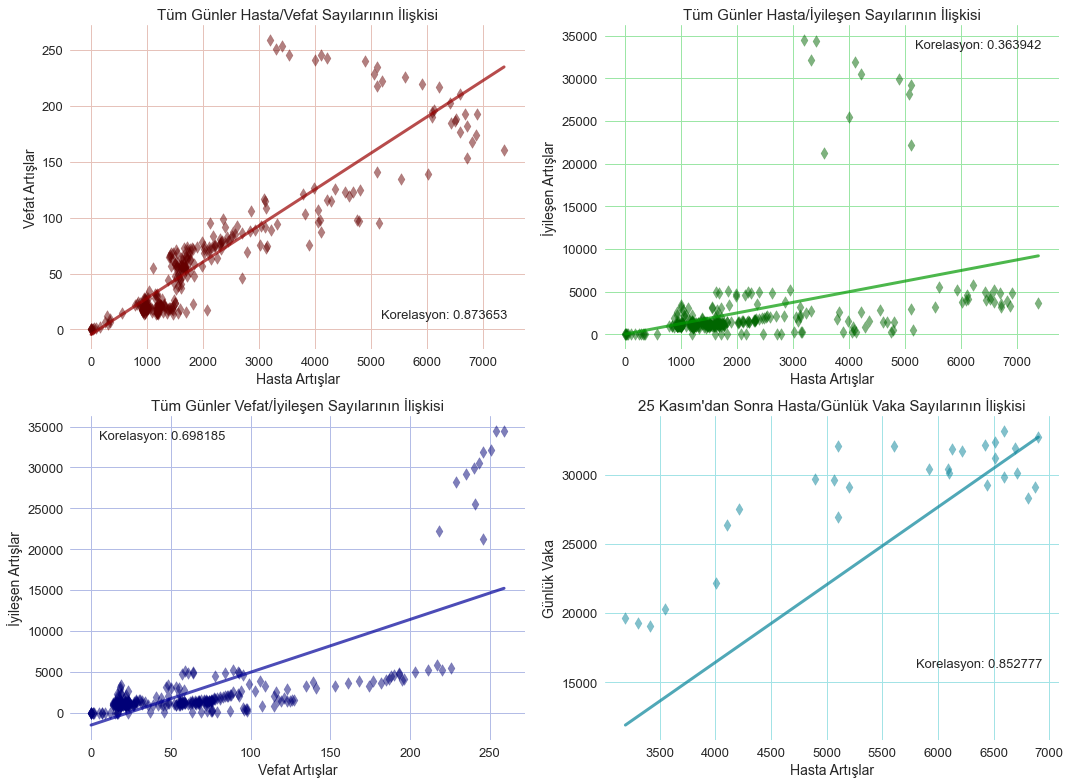

In [20]:
slp1, intcp1 = np.polyfit(covid19TR['Hasta Artış'][1:], covid19TR['Vefat Artış'][1:],1)
x1 = [0, covid19TR['Hasta Artış'].max()]
y1 = [intcp1+x1[0], intcp1+(slp1*x1[1])]
plt.figure(figsize=(15,11))
plt.subplot(2, 2, 1)
plt.plot(x1, y1, alpha=0.7, linewidth=3, color='#990000')
plt.scatter(covid19TR['Hasta Artış'], covid19TR['Vefat Artış'], marker='d', s=70, color='#660000', alpha=0.5)
plt.text(covid19TR['Hasta Artış'].max()-2200, 10,
         "Korelasyon: " + str(round(np.corrcoef(covid19TR['Hasta Artış'][1:], covid19TR['Vefat Artış'][1:])[0,1], 6)),
         fontsize=13)
plt.title('Tüm Günler Hasta/Vefat Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Vefat Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#e6c2ba')
hasta_artis_12ara_haric = np.concatenate((covid19TR['Hasta Artış'][1:276].values,covid19TR['Hasta Artış'][277:].values))
iyilesen_artis_12ara_haric = np.concatenate((covid19TR['İyileşen Artış'][1:276].values,
                                             covid19TR['İyileşen Artış'][277:].values))
slp2, intcp2 = np.polyfit(hasta_artis_12ara_haric, iyilesen_artis_12ara_haric, 1)
x2 = [0, hasta_artis_12ara_haric.max()]
y2 = [intcp2+x2[0], intcp2+(slp2*x2[1])]
plt.subplot(2, 2, 2)
plt.scatter(hasta_artis_12ara_haric, iyilesen_artis_12ara_haric, marker='d', s=70, color='#006600', alpha=0.5)
plt.plot(x2, y2, alpha=0.7, linewidth=3, color='#009900')
plt.text(hasta_artis_12ara_haric.max()-2200, iyilesen_artis_12ara_haric.max()-1000,
        "Korelasyon: " + str(round(np.corrcoef(hasta_artis_12ara_haric, iyilesen_artis_12ara_haric)[0,1], 6)), fontsize=13)
plt.title('Tüm Günler Hasta/İyileşen Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#9ce6a6')
vefat_artis_12ara_haric = np.concatenate((covid19TR['Vefat Artış'][1:276].values,covid19TR['Vefat Artış'][277:].values))
slp3, intcp3 = np.polyfit(vefat_artis_12ara_haric, iyilesen_artis_12ara_haric, 1)
x3 = [0, vefat_artis_12ara_haric.max()]
y3 = [intcp3+x3[0], intcp3+(slp3*x3[1])]
plt.subplot(2, 2, 3)
plt.scatter(vefat_artis_12ara_haric, iyilesen_artis_12ara_haric, marker='d', s=70, color='#000077', alpha=0.5)
plt.plot(x3, y3, alpha=0.7, linewidth=3, color='#000099')
plt.text(vefat_artis_12ara_haric.min()+5, iyilesen_artis_12ara_haric.max()-1000,
         "Korelasyon: " + str(round(np.corrcoef(vefat_artis_12ara_haric, iyilesen_artis_12ara_haric)[0,1], 6)), fontsize=13)
plt.title('Tüm Günler Vefat/İyileşen Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Vefat Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#b3bce6')
slp4, intcp4 = np.polyfit(covid19TR['Hasta Artış'][259:], covid19TR['Günlük Vaka'][259:], 1)
x4 = [covid19TR['Hasta Artış'][259:].min(), covid19TR['Hasta Artış'][259:].max()]
y4 = [intcp4, intcp4+(slp4*(x4[1]))]
plt.subplot(2, 2, 4)
plt.scatter(covid19TR['Hasta Artış'][259:], covid19TR['Günlük Vaka'][259:], marker='d', s=70, color='#068399', alpha=0.5)
plt.title('25 Kasım\'dan Sonra Hasta/Günlük Vaka Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Günlük Vaka', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(x4, y4, alpha=0.7, linewidth=3, color='#068399')
plt.text(covid19TR['Hasta Artış'][259:].max()-1100, covid19TR['Günlük Vaka'][259:].min()-3000,
         "Korelasyon: " + str(round(np.corrcoef(covid19TR['Hasta Artış'][259:], covid19TR['Günlük Vaka'][259:])[0,1], 6)),
         fontsize=13)
plt.grid(color='#a3e3e6')
plt.tight_layout()
plt.show()

_**ÖNEMLİ:** 12 Aralık'a ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından ilgili grafiklere dahil edilmemiştir!_

### **Son Günlere Dair Hasta, Vaka, Vefat & İyileşen Sayısı Değişimi İstatistikleri ve Dağılımları**

In [21]:
# Son 90 Gün - Hasta ve Vefat Sayısı Değişimleri
round(covid19TR[['Hasta +/-', 'Vefat +/-']][-90:].describe(),2)

,Hasta +/-,Vefat +/-
count,90.00,90.00
mean,16.34,2.06
std,257.54,4.74
min,-775.00,-6.00
25%,-100.75,-2.00
50%,21.00,2.50
75%,117.25,5.00
max,696.00,18.00


In [22]:
# Son 10 Gün - İyileşen Hasta Sayısı Değişimi (izolasyon süresi dolan vakalar dahil)
round(covid19TR['İyileşen +/-'][-10:].describe(), 2)

count       10.00
mean      1227.70
std       5471.70
min      -6429.00
25%      -1588.75
50%        879.00
75%       2149.25
max      13201.00
Name: İyileşen +/-, dtype: float64

In [23]:
# Günlük Vaka Sayısı Değişimi (25 Kasım ve sonrası)
round(covid19TR['Vaka +/-'][260:].describe(), 2)

count      28.00
mean     -310.75
std      1757.84
min     -4215.00
25%     -1488.00
50%      -334.50
75%       851.00
max      2698.00
Name: Vaka +/-, dtype: float64

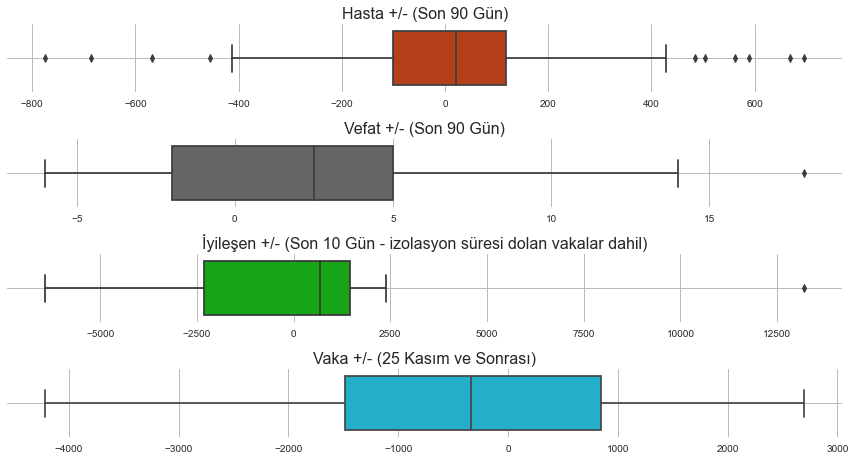

In [24]:
plt.figure(figsize=(12,6.5))
plt.subplot(4,1,1)
sns.boxplot(x=['Hasta +/-'], data=covid19TR[-90:], color='#cc3300')
plt.grid(color='#bbbbbb')
plt.title('Hasta +/- (Son 90 Gün)', fontsize=16)
plt.subplot(4,1,2)
sns.boxplot(x=['Vefat +/-'], data=covid19TR[-90:], color='#666666')
plt.grid(color='#bbbbbb')
plt.title('Vefat +/- (Son 90 Gün)', fontsize=16)
plt.subplot(4,1,3)
sns.boxplot(x=['İyileşen +/-'], data=covid19TR[-9:], color='#00bb00')
plt.grid(color='#bbbbbb')
plt.title('İyileşen +/- (Son 10 Gün - izolasyon süresi dolan vakalar dahil)', fontsize=16)
plt.subplot(4,1,4)
sns.boxplot(x=['Vaka +/-'], data=covid19TR[260:], color='#09c2e3')
plt.grid(color='#bbbbbb')
plt.title('Vaka +/- (25 Kasım ve Sonrası)', fontsize=16)
plt.tight_layout()
plt.show()

### **Son 20 Günün Hasta Sayısı Değişim Grafiği**

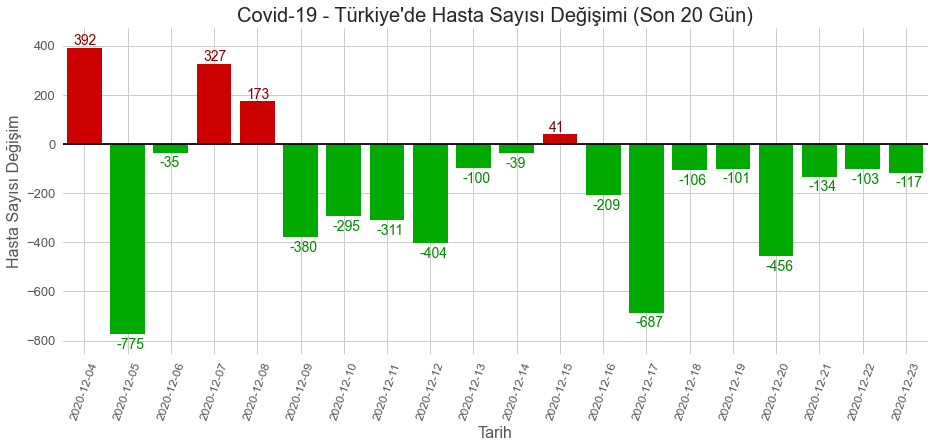

In [25]:
plt.figure(figsize=(15.5,6))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], covid19TR['Hasta +/-'][-20:], color=barc)
plt.axis([-0.5,19.5,min(covid19TR['Hasta +/-'][-20:])-80,max(covid19TR['Hasta +/-'][-20:])+80])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        plt.text(i-(len(covid19TR)-19.75), covid19TR.iloc[i,14]+10, int(covid19TR.iloc[i,14]), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.75), covid19TR.iloc[i,14]-58, int(covid19TR.iloc[i,14]), fontsize=14, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün hasta sayısı değişimine baktığımızda, en çok **392** (4 aralık) artış ve en çok da **775** (5 Aralık) azalış yaşanmıştır. Hasta sayısı değişiminde düşüşlerin çok daha sık olması gelecek açısından umut vericidir!

### Son 20 Günün Vaka Sayısı Değişim Grafiği

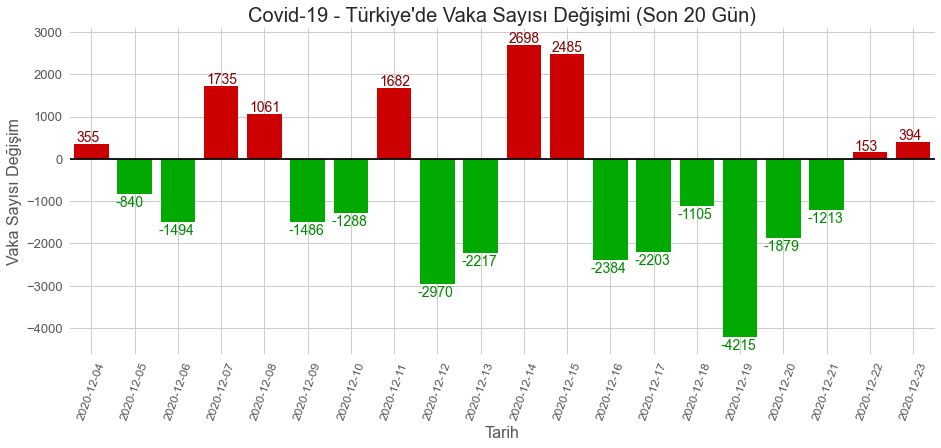

In [26]:
plt.figure(figsize=(15.5,6))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,17] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], covid19TR['Vaka +/-'][-20:], color=barc)
plt.axis([-0.5,19.5,min(covid19TR['Vaka +/-'][-20:])-400,max(covid19TR['Vaka +/-'][-20:])+400])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,17] >= 0:
        plt.text(i-(len(covid19TR)-19.65), covid19TR.iloc[i,17]+50, int(covid19TR.iloc[i,17]), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.55), covid19TR.iloc[i,17]-300, int(covid19TR.iloc[i,17]), fontsize=14, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vaka Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vaka Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vaka sayısı değişimi incelendiğinde, en çok **2698** artış (14 Aralık'ta), ve en çok **4215** azalış (19 Aralık'ta) meydana gelmiştir. Bu değişimlerin çoğunlukla **aşağı yönde** olması umut veren bir başka faktördür.

### **Son 20 Günün Vefat Sayısı Değişim Grafiği**

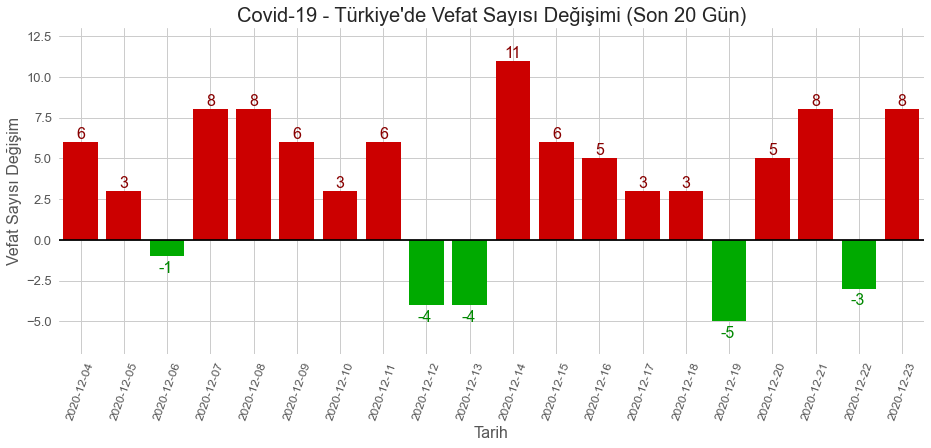

In [27]:
plt.figure(figsize=(15.5,6))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,15] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], covid19TR['Vefat +/-'][-20:], color=barc)
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(covid19TR['Vefat +/-'][-20:])-2, max(covid19TR['Vefat +/-'][-20:])+2])
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,15] >= 10:
        plt.text(i-(len(covid19TR)-19.80), covid19TR.iloc[i,15]+0.2, int(covid19TR.iloc[i,15]), fontsize=16, color='#880000')
    elif covid19TR.iloc[i,15] >= 0:
        plt.text(i-(len(covid19TR)-19.90), covid19TR.iloc[i,15]+0.2, int(covid19TR.iloc[i,15]), fontsize=16, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.80), covid19TR.iloc[i,15]-1.0, int(covid19TR.iloc[i,15]), fontsize=16, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Yukarıdaki grafiğe göre, vefat sayısı son 20 gün için önceki güne kıyasla en fazla **11** yükselmiş (14 Aralık'ta) ve en fazla **5** azalmıştır (19 Aralık'ta). Sadece **beş farklı günde** azalışın gerçekleşmesi bu yönden endişe vericidir!

### **Son 20 Günün İyileşen Hasta Sayısı Değişim Grafiği**

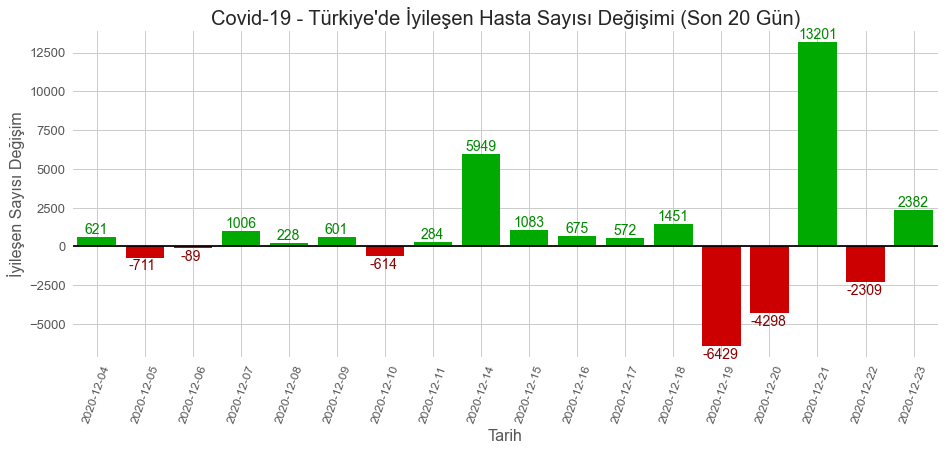

In [28]:
iyilesen_degisim = np.concatenate((covid19TR['İyileşen +/-'][268:276].values, covid19TR['İyileşen +/-'][278:].values))
index = np.concatenate((covid19TR['İyileşen +/-'][268:276].index, covid19TR['İyileşen +/-'][278:].index))
plt.figure(figsize=(15.5,6))
barc = []
for i in range(18):
    if iyilesen_degisim[i] >= 0:
        barc.append('#00aa00')
    else:   barc.append('#cc0000')
plt.bar(index, iyilesen_degisim, color=barc)
plt.xticks(index, rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 17.5, min(iyilesen_degisim)-700, max(iyilesen_degisim)+700])
for i in range(18):
    if iyilesen_degisim[i] >= 0:
        if int(iyilesen_degisim[i]) >= 10000:    sh = 0.4
        elif int(iyilesen_degisim[i]) >= 1000:   sh = 0.33
        elif int(iyilesen_degisim[i]) >= 100:    sh = 0.25
        else:    sh = 0.18
        plt.text(i-sh, iyilesen_degisim[i]+200, int(iyilesen_degisim[i]), fontsize=14, color='#008800')
    else:
        if int(iyilesen_degisim[i]) <= -1000:     sh = 0.4
        elif int(iyilesen_degisim[i]) <= -100:    sh = 0.33
        else:    sh = 0.25
        plt.text(i-sh, iyilesen_degisim[i]-800, int(iyilesen_degisim[i]), fontsize=14, color='#880000')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyileşen Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

_**ÖNEMLİ:** 12 Aralık'a ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından 12 ve 13 Aralık'ın değerleri grafiğe dahil edilmemiştir!_

Son 20 günün iyileşen hasta sayısı değişiminde, en fazla artış **21 Aralık**'ta **13201** ile gerçekleşirken; en fazla düşüş **6429** ile **19 Aralık**'ta gerçekleşmiştir.

### **Toplam Aktif Vaka Sayıları (12 Aralık ve Sonrası)**

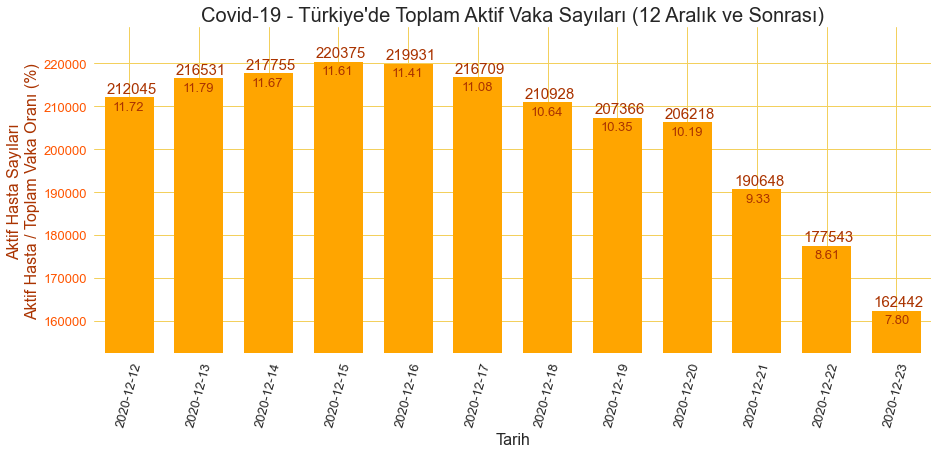

In [29]:
covid19TR['Toplam Aktif Vaka'] = covid19TR['Toplam Vaka'] - covid19TR['Toplam Vefat'] - covid19TR['Toplam İyileşen']
plt.figure(figsize=(15,6))
plt.bar(covid19TR.index[-12:], covid19TR['Toplam Aktif Vaka'][-12:], color='orange', width=0.7)
plt.axis([-0.5,11.5,covid19TR['Toplam Aktif Vaka'][-11:].min()-10000,covid19TR['Toplam Aktif Vaka'][-11:].max()+8000])
for i in range(len(covid19TR)-12,len(covid19TR)):
    plt.text(i-(len(covid19TR)-11.67), covid19TR.iloc[i,19]+1000, int(covid19TR.iloc[i,19]),
             fontsize=15, color='#aa3300')
    if covid19TR.iloc[i,19]/covid19TR.iloc[i,9]*100 >= 10:
        plt.text(i-(len(covid19TR)-11.76), covid19TR.iloc[i,19]-3000, 
             "{:.2f}".format(round(covid19TR.iloc[i,19]/covid19TR.iloc[i,9]*100, 2)), fontsize=13, color='#aa3300')
    else:
        plt.text(i-(len(covid19TR)-11.83), covid19TR.iloc[i,19]-3000, 
             "{:.2f}".format(round(covid19TR.iloc[i,19]/covid19TR.iloc[i,9]*100, 2)), fontsize=13, color='#aa3300')
plt.xticks(rotation=75, fontsize=13)
plt.yticks(fontsize=13, color='#ff5500')
plt.title('Covid-19 - Türkiye\'de Toplam Aktif Vaka Sayıları (12 Aralık ve Sonrası)', fontsize=20)
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Aktif Hasta Sayıları\nAktif Hasta / Toplam Vaka Oranı (%)', fontsize=16, color='#aa3300')
plt.grid(color='#f3d05d')
plt.show()

12 Aralık ve sonraki günler için toplam aktif vaka sayılarına baktığımızda, en yüksek sayı **220375** ile 15 Aralık'ta ulaşılmış, sonraki günlerde de azalmaya geçerek, en son 23 Aralık'ta **162442**'ye kadar gerilemiştir. Bu sayının toplam vaka sayısına oranı da **%7.80**'e tekabül etmektedir.

### Son 4 Hafta için Hastalarda Zatürre Oranları ve Ağır Hasta Sayıları

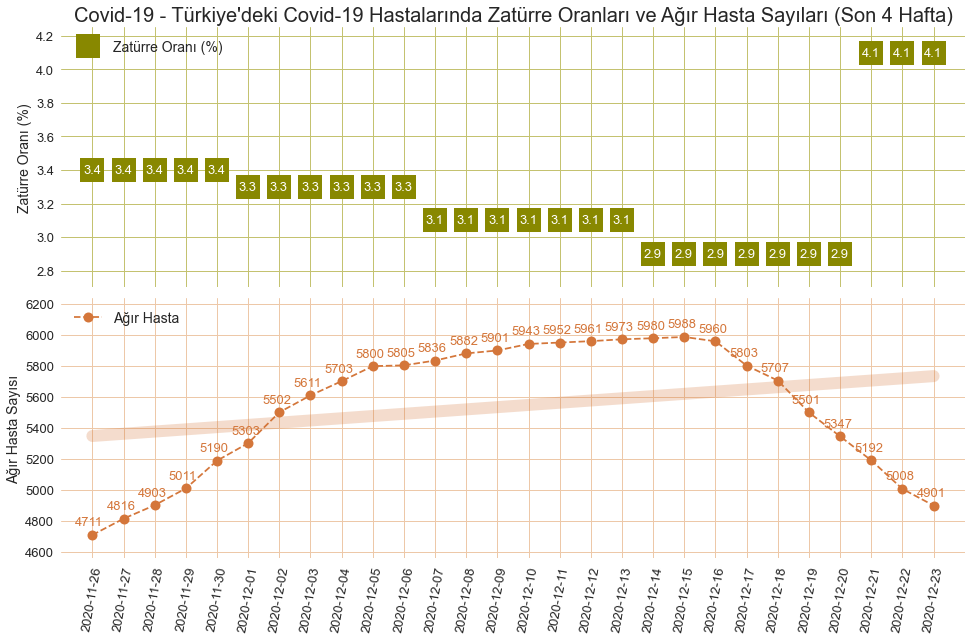

In [30]:
plt.figure(figsize=(14.2,9))
lm = len(covid19TR)-28
plt.subplot(2,1,1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,6], linestyle=' ', marker='s', markersize=24,
         label='Zatürre Oranı (%)', color='#888800')
for i in range(lm, len(covid19TR)):
    plt.text(i-lm-0.3, covid19TR.iloc[i,6]-0.02, covid19TR.iloc[i,6], fontsize=13, color='white')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,6].min()-0.2, covid19TR.iloc[lm:,6].max()+0.15])
plt.title('Covid-19 - Türkiye\'deki Covid-19 Hastalarında Zatürre Oranları ve Ağır Hasta Sayıları (Son 4 Hafta)', fontsize=20)
plt.ylabel('Zatürre Oranı (%)', fontsize=14)
plt.xticks(covid19TR.index[lm:], ['' for _ in range(len(covid19TR.index[lm:]))])
plt.yticks(fontsize=13)
plt.grid(color='#c4c270')
plt.legend(loc='upper left', fontsize=14)
         
plt.subplot(2,1,2)
slp, intcp = np.polyfit(list(range(28)), covid19TR['Ağır Hasta'][-28:], 1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,7], linestyle='--', marker='o', markersize=10,
         label='Ağır Hasta', color='#d4763a')
plt.plot([0, 27],[intcp, intcp+(slp*27)], color='#d4763a', alpha=0.25, linewidth=12)
for i in range(lm,len(covid19TR)):
    plt.text(i-lm-0.55, covid19TR.iloc[i,7]+60, int(covid19TR.iloc[i,7]), fontsize=13, color='#d4763a')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,7].min()-150, covid19TR.iloc[lm:,7].max()+250])
plt.ylabel('Ağır Hasta Sayısı', fontsize=14)
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#edc8a8')
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()

**Son 4 hafta için hastalardaki zatürre oranları ve ağır hasta sayıları için;**

_Hastalarda Zatürre Oranı,_ son dört hafta içinde sırayla **%3.4**, **%3.3**, **%3.1**, **%2.9** ve son olarak **%4.1** şeklinde ölçülmüştür.

**Not:** Bu oranların genellikle haftalık bazda verildiği ve ilgili günlerde dolayısıyla aynı olarak kaldığı dikkate alınmalıdır.

_Ağir Hasta Sayısı_ **5 Aralık** gününe kadar hızla yükselmiş, ardından yatay seyirde devam etmiş ve özellikle **16 Aralık**'tan sonra hızla düşmeye başlamıştır. Son olarak **23 Aralık**'ta ağır hasta sayısı **4901** olmuştur.

### Hasta, Vefat, İyileşen, Test ve Vaka Artışlarının İkişer Haftalık Toplamları

In [31]:
analiz_sutunlar = ['Hasta Artış', 'Vefat Artış', 'İyileşen Artış', 'Test Artış', 'Günlük Vaka',
                   'Hasta +/-', 'Vefat +/-', 'İyileşen +/-', 'Test +/-', 'Vaka +/-']
covid19TR = covid19TR.reset_index()
covid19TR['Tarih'] = pd.to_datetime(covid19TR['Tarih'])
covid19TR_haftalik_toplam = covid19TR.resample('2W', on='Tarih')[analiz_sutunlar[:5]].sum()
covid19TR_haftalik_toplam

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış,Günlük Vaka
Tarih,,,,,
2020-03-15,17,0,0,0,0
2020-03-29,9199,131,105,65446,0
2020-04-12,47739,1067,3341,310654,0
2020-04-26,53174,1607,25694,513642,0
2020-05-10,28527,981,63551,480856,0
2020-05-24,18170,554,26003,461664,0
2020-06-07,13305,352,19275,506331,0
2020-06-21,17553,258,22271,606647,0
2020-07-05,18073,275,20440,685240,0


### Aynı Sütunların ve Değişimlerinin İkişer Haftalık Ortalamaları

In [32]:
covid19TR_haftalik_ortalama = covid19TR.resample('2W', on='Tarih')[analiz_sutunlar].mean().fillna(0)
round(covid19TR_haftalik_ortalama, 2)

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış,Günlük Vaka,Hasta +/-,Vefat +/-,İyileşen +/-,Test +/-,Vaka +/-
Tarih,,,,,,,,,,
2020-03-15,3.40,0.00,0.00,0.00,0.00,2.40,0.00,0.00,0.00,0.00
2020-03-29,657.07,9.36,7.50,4674.71,0.00,128.79,1.64,2.50,713.00,0.00
2020-04-12,3409.93,76.21,238.64,22189.57,0.00,212.43,5.29,31.86,1838.43,0.00
2020-04-26,3798.14,114.79,1835.29,36688.71,0.00,-173.71,0.14,219.79,-1038.79,0.00
2020-05-10,2037.64,70.07,4539.36,34346.86,0.00,-58.21,-3.71,-24.79,1072.14,0.00
2020-05-24,1297.86,39.57,1857.36,32976.00,0.00,-28.64,-1.07,-151.36,-828.43,0.00
2020-06-07,950.36,25.14,1376.79,36166.50,0.00,-16.21,-0.64,111.07,767.57,0.00
2020-06-21,1253.79,18.43,1590.79,43331.93,0.00,19.86,0.00,-88.21,368.64,0.00
2020-07-05,1290.93,19.64,1460.00,48945.71,0.00,-3.14,-0.29,-16.00,422.71,0.00


**Sonuç olarak; yukarıdaki analizlerde tüm bu rakamlar ve görseller şunu işaret ediyor ki Türkiye'de Koronavirüs tehlikesi eğer kısıtlamalar ve kapanmalar olmadığı müddetçe kış mevsiminde GİDEREK YÜKSELMEYE devam edecek! Aksi takdirde eğer önlemler alındığı sürece bu tehlikenin azalma eğiliminde olduğu görülebilmektedir.**

**Dolayısıyla, ilerleyen aylarda virüsün yayılmasına engel olmak için asla ve asla virüs yokmuş gibi davranmamaya; kendimizi, sevdiklerimizi ve etrafımızdaki insanları önemseyerek önlemlerimizi alarak kontrollü yaşamaya devam edelim. Zorunlu kalmadıkça dışarı çıkmayalım; eğer dışarıdaysak maske takmaya, dezenfaktan kullanmaya, kalabalık ortamlarda fazla kalmamaya ve açık/kapalı alanlarda sosyal mesafeyi korumaya LÜTFEN özen gösterelim! Tabi, hafta içi her akşam ve hafta sonu kısıtlamalarına mutlaka riayet edelim!**

## Virüsü tamamen yendiğimiz günlerde buluşmak dileğiyle...